Iteration 0, Train Loss: 0.6929, Test Loss: 0.6929
Train Accuracy: 0.4238, Test Accuracy: 0.4500
Iteration 200, Train Loss: 0.2724, Test Loss: 0.2475
Train Accuracy: 0.8762, Test Accuracy: 0.8850
Iteration 400, Train Loss: 0.2642, Test Loss: 0.2353
Train Accuracy: 0.8762, Test Accuracy: 0.8950
Iteration 600, Train Loss: 0.2582, Test Loss: 0.2288
Train Accuracy: 0.8825, Test Accuracy: 0.8950
Iteration 800, Train Loss: 0.2516, Test Loss: 0.2223
Train Accuracy: 0.8862, Test Accuracy: 0.9000
Iteration 1000, Train Loss: 0.2430, Test Loss: 0.2147
Train Accuracy: 0.8900, Test Accuracy: 0.9100
Iteration 1200, Train Loss: 0.2306, Test Loss: 0.2040
Train Accuracy: 0.8988, Test Accuracy: 0.9100
Iteration 1400, Train Loss: 0.2118, Test Loss: 0.1880
Train Accuracy: 0.9075, Test Accuracy: 0.9100
Iteration 1600, Train Loss: 0.1854, Test Loss: 0.1653
Train Accuracy: 0.9213, Test Accuracy: 0.9200
Iteration 1800, Train Loss: 0.1537, Test Loss: 0.1380
Train Accuracy: 0.9363, Test Accuracy: 0.9350


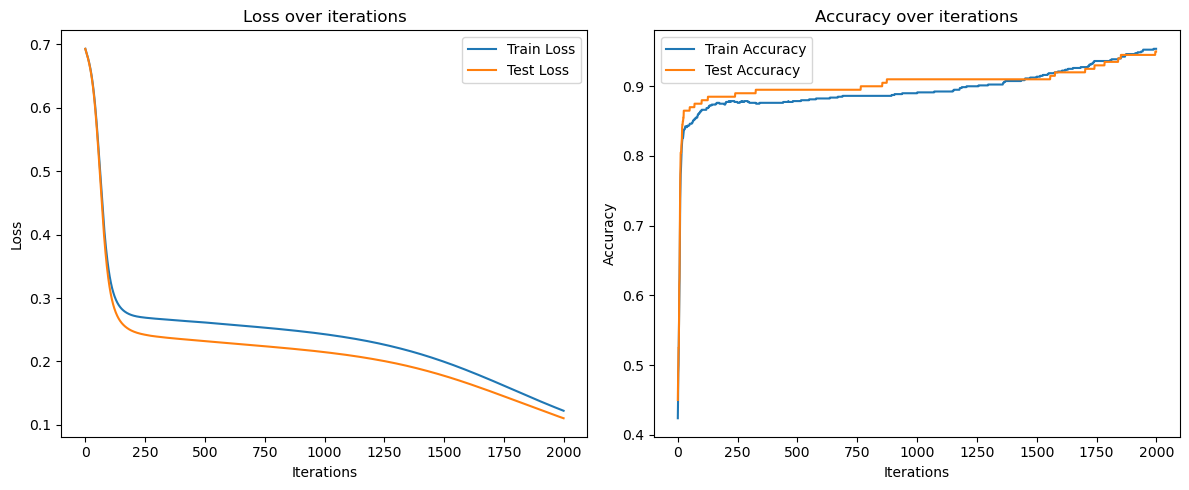

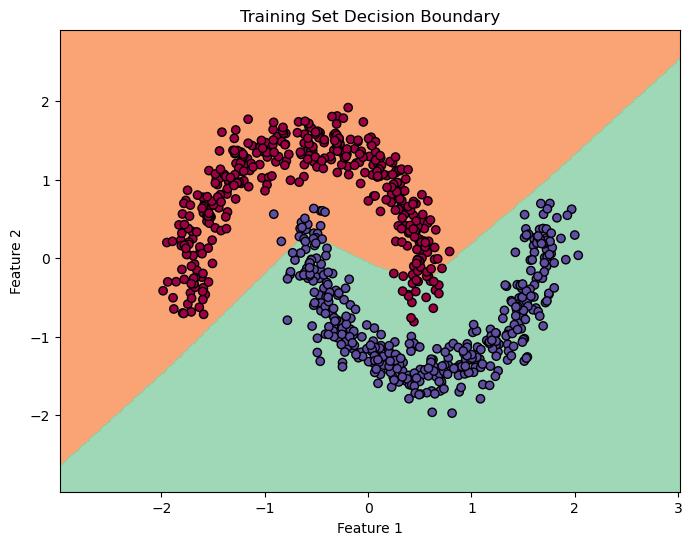

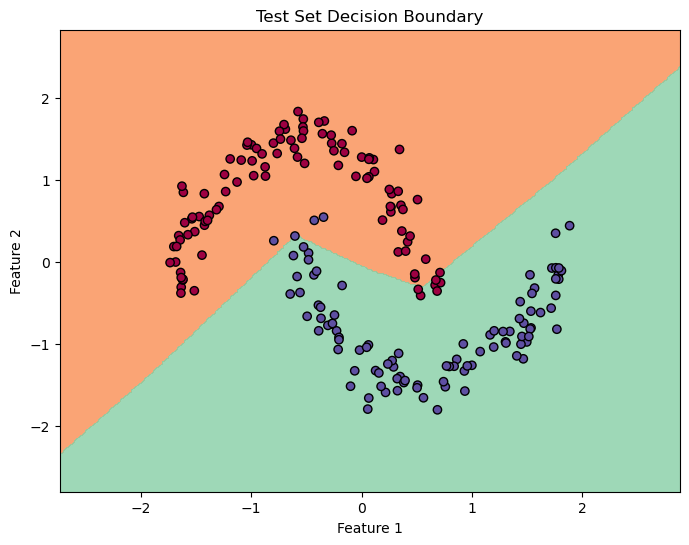

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

# 生成make_moons数据集
X, y = make_moons(n_samples=1000, noise=0.1, random_state=42)
X = X.T  # 转置为n0行m列 (2特征×1000样本)
y = y.reshape(1, -1)  # 转换为1行m列 (1×1000)

# 数据集划分 (80%训练，20%测试)
def train_test_split(X, y, test_size=0.2):
    m = X.shape[1]
    split_idx = int(m * (1 - test_size))
    indices = np.random.permutation(m)
    train_idx, test_idx = indices[:split_idx], indices[split_idx:]
    return X[:, train_idx], X[:, test_idx], y[:, train_idx], y[:, test_idx]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# 数据标准化
def normalize(X):
    mean = np.mean(X, axis=1, keepdims=True)
    std = np.std(X, axis=1, keepdims=True)
    return (X - mean) / std

X_train = normalize(X_train)
X_test = normalize(X_test)

# 网络参数初始化
n0 = X_train.shape[0]  # 输入层神经元数 (2)
n1 = 12  # 隐藏层神经元数
n2 = 1   # 输出层神经元数 (二分类)

# 初始化参数
def initialize_parameters(n0, n1, n2):
    w1 = np.random.randn(n1, n0) * 0.1
    b1 = np.zeros((n1, 1))
    w2 = np.random.randn(n2, n1) * 0.1
    b2 = np.zeros((n2, 1))
    return w1, b1, w2, b2

w1, b1, w2, b2 = initialize_parameters(n0, n1, n2)

# 激活函数
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

# 前向传播
def forward_propagation(X, w1, b1, w2, b2):
    z1 = np.dot(w1, X) + b1
    a1 = relu(z1)
    z2 = np.dot(w2, a1) + b2
    a2 = sigmoid(z2)
    return z1, a1, z2, a2

# 计算损失
def compute_loss(a2, Y):
    m = Y.shape[1]
    loss = -1/m * np.sum(Y * np.log(a2 + 1e-15) + (1 - Y) * np.log(1 - a2 + 1e-15))
    return np.squeeze(loss)

# 反向传播
def backward_propagation(X, Y, z1, a1, a2, w2):
    m = X.shape[1]
    
    dz2 = a2 - Y
    dw2 = 1/m * np.dot(dz2, a1.T)
    db2 = 1/m * np.sum(dz2, axis=1, keepdims=True)
    
    dz1 = np.dot(w2.T, dz2) * (z1 > 0)  # ReLU的导数
    dw1 = 1/m * np.dot(dz1, X.T)
    db1 = 1/m * np.sum(dz1, axis=1, keepdims=True)
    
    return dw1, db1, dw2, db2

# 参数更新
def update_parameters(w1, b1, w2, b2, dw1, db1, dw2, db2, learning_rate):
    w1 = w1 - learning_rate * dw1
    b1 = b1 - learning_rate * db1
    w2 = w2 - learning_rate * dw2
    b2 = b2 - learning_rate * db2
    return w1, b1, w2, b2

# 训练模型
def model(X, Y, X_test, Y_test, n1, learning_rate=0.1, iterations=2000):
    n0 = X.shape[0]
    n2 = Y.shape[0]
    
    w1, b1, w2, b2 = initialize_parameters(n0, n1, n2)
    
    train_losses = []
    test_losses = []
    train_accuracies = []
    test_accuracies = []
    
    for i in range(iterations):
        # 前向传播
        z1, a1, z2, a2 = forward_propagation(X, w1, b1, w2, b2)
        
        # 计算训练损失
        train_loss = compute_loss(a2, Y)
        train_losses.append(train_loss)
        
        # 计算训练准确率
        train_predictions = (a2 > 0.5).astype(int)
        train_accuracy = np.mean(train_predictions == Y)
        train_accuracies.append(train_accuracy)
        
        # 测试集性能
        z1_test, a1_test, z2_test, a2_test = forward_propagation(X_test, w1, b1, w2, b2)
        test_loss = compute_loss(a2_test, Y_test)
        test_losses.append(test_loss)
        
        test_predictions = (a2_test > 0.5).astype(int)
        test_accuracy = np.mean(test_predictions == Y_test)
        test_accuracies.append(test_accuracy)
        
        # 反向传播
        dw1, db1, dw2, db2 = backward_propagation(X, Y, z1, a1, a2, w2)
        
        # 参数更新
        w1, b1, w2, b2 = update_parameters(w1, b1, w2, b2, dw1, db1, dw2, db2, learning_rate)
        
        if i % 200 == 0:
            print(f"Iteration {i}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}")
            print(f"Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}")
    
    return w1, b1, w2, b2, train_losses, test_losses, train_accuracies, test_accuracies

# 训练模型
w1, b1, w2, b2, train_losses, test_losses, train_accuracies, test_accuracies = model(
    X_train, y_train, X_test, y_test, n1, learning_rate=0.1, iterations=2000)

# 绘制损失曲线
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.title('Loss over iterations')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()

# 绘制准确率曲线
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(test_accuracies, label='Test Accuracy')
plt.title('Accuracy over iterations')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# 绘制决策边界和分类结果
def plot_decision_boundary(X, Y, w1, b1, w2, b2, title):
    # 创建网格点
    h = 0.02
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    # 预测网格点的类别
    Z = np.c_[xx.ravel(), yy.ravel()].T
    _, _, _, a2 = forward_propagation(Z, w1, b1, w2, b2)
    Z = (a2 > 0.5).reshape(xx.shape)
    
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
    
    # 绘制数据点
    plt.scatter(X[0, :], X[1, :], c=Y.flatten(), cmap=plt.cm.Spectral, edgecolors='k')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# 绘制训练集和测试集的决策边界
plot_decision_boundary(X_train, y_train, w1, b1, w2, b2, "Training Set Decision Boundary")
plot_decision_boundary(X_test, y_test, w1, b1, w2, b2, "Test Set Decision Boundary")